In [1]:
# -*- coding: utf-8 -*-
import pandas as pd
import time
import matplotlib.pyplot as plt
import scipy.stats as st
import sklearn.linear_model as lm
import numpy as np
np.random.seed(1555)
from keras.models import Sequential,load_model,Model
from keras.layers import Dense,Reshape,Dropout,MaxoutDense
from keras.layers.advanced_activations import LeakyReLU,PReLU,SReLU
from keras.callbacks import EarlyStopping

earlyStopping=EarlyStopping(monitor='val_loss', patience=0, verbose=0, mode='auto')

from keras.regularizers import l1,l2
from keras.constraints import nonneg

%matplotlib inline
import tensorflow
import keras
import math
import time
import datetime
from sklearn import cluster, datasets, metrics


from sklearn import preprocessing

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

Using TensorFlow backend.


In [2]:
oli = pd.read_csv('cleanoutwvd.csv')
olier = oli.copy();
olier=olier.drop(['YY','day','date','time','direct','lane','eqflow','fakeornot','realvd'],axis=1);olier
olierclo = olier.columns.tolist()
olier=olier[olierclo[:-2]+olierclo[-1:]+olierclo[-2:-1]]


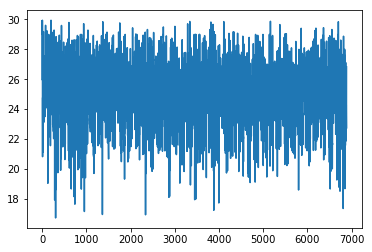

In [89]:
i=17

olieri=olier[olier.sortby==i]
plt.plot(olieri.speed.values)

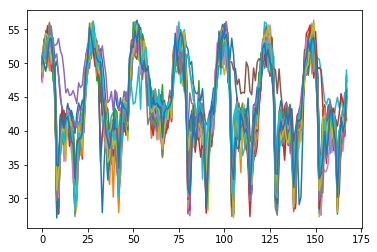

In [93]:
i=4

olieri=olier[olier.sortby==i]
for x in range(0,len(olieri),168):
    plt.plot(olieri.speed[x:x+168].values)



In [60]:
plt.figure(figsize=(10,6))
alll=[]
for i in range(42):
    olieri=olier[olier.sortby==i]
#     print i,'\t',round(olieri.speed.max(),2),'\t',round(olieri.speed.mean(),2),'\t',round(olieri.speed.min(),2)
    temp = []
    temp.append(i)
    temp.append(round(olieri.speed.max(),2))
    temp.append(round(olieri.speed.mean(),2))
    temp.append(round(olieri.speed.min(),2))
    alll.append(temp)
    
#     if (olieri.speed.max()>35)&(olieri.speed.max()<45) :
#         plt.plot(olieri.speed.values)
#         print i
speeddf=pd.DataFrame(alll,columns=['ind','maxs','means','mins'])
speeddf['maxmin'] = speeddf.maxs-speeddf.mins
speeddf.sort_values('maxs')

,ind,maxs,means,mins,maxmin
17,17,29.95,24.77,16.71,13.24
41,41,40.05,26.75,18.84,21.21
14,14,41.16,35.35,14.67,26.49
0,0,41.64,34.30,26.95,14.69
40,40,44.17,38.43,31.25,12.92
24,24,46.00,33.36,17.25,28.75
15,15,48.42,38.03,22.68,25.74
25,25,49.17,36.77,17.40,31.77
7,7,49.18,41.74,33.29,15.89
9,9,49.21,43.13,33.55,15.66


In [56]:
speeddf.sort_values('means')

,ind,maxs,means,mins
17,17,29.95,24.77,16.71
41,41,40.05,26.75,18.84
24,24,46.00,33.36,17.25
0,0,41.64,34.30,26.95
14,14,41.16,35.35,14.67
16,16,50.85,36.23,21.42
25,25,49.17,36.77,17.40
2,2,59.91,37.85,15.41
15,15,48.42,38.03,22.68
40,40,44.17,38.43,31.25


In [57]:
speeddf.sort_values('mins')


,ind,maxs,means,mins
14,14,41.16,35.35,14.67
2,2,59.91,37.85,15.41
17,17,29.95,24.77,16.71
24,24,46.00,33.36,17.25
25,25,49.17,36.77,17.40
33,33,187.50,64.71,17.60
13,13,69.99,54.00,18.10
23,23,171.38,39.24,18.36
41,41,40.05,26.75,18.84
16,16,50.85,36.23,21.42


In [75]:
speeddf.sort_values('maxmin').reset_index().drop('index',axis=1).ix[:15,:].sort_values('means')

,ind,maxs,means,mins,maxmin
2,17,29.95,24.77,16.71,13.24
12,41,40.05,26.75,18.84,21.21
3,0,41.64,34.30,26.95,14.69
1,40,44.17,38.43,31.25,12.92
6,7,49.18,41.74,33.29,15.89
7,1,49.37,42.22,32.72,16.65
5,9,49.21,43.13,33.55,15.66
4,28,52.07,44.23,37.18,14.89
15,6,58.10,45.19,35.05,23.05
11,27,55.85,47.11,35.53,20.32


31